# Clean and Analyze Employee Exit Surveys

#### INTRODUCTION
In this project, we will analyze exit surveys conducted by the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. Our goal is to explore patterns and correlations related to employee resignations. By cleaning and combining the exit survey data, we aim to address specific questions:

Are short-tenured employees resigning due to dissatisfaction compared to longer-tenured ones?
Is there a connection between age and employee dissatisfaction?
We'll apply data cleaning techniques, handle missing values, and reshape the data for analysis. The project involves comparing exit reasons, employment durations, and age groups to uncover insights into employee turnover and satisfaction.

In [26]:
import pandas as pd
import numpy as np

# Read Dete survey
dete_survey = pd.read_csv('dete_survey.csv')

# Read TAFE survey data
tafe_survey = pd.read_csv('tafe_survey.csv')


#about the dete survery
dete_survey.info()
dete_survey.head() 
dete_survey.isnull()

#about the Tafe survey
tafe_survey.info()
tafe_survey.head()
tafe_survey.isnull()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
699,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
700,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


#### Observations from DETE and TAFE Surveys:

###### DETE Survey:

1. Dataset contains 822 entries and 56 columns.
2. Varied data types: integers, booleans, objects (strings).
3. Some columns have significant missing values, like 'Classification' and 'Business Unit'.
4. SeparationType' categorizes reasons for separation; 'Cease Date' captures employment end dates.
5. Columns cover factors contributing to dissatisfaction and career aspirations.

###### TAFE Survey:

1. Dataset includes 702 entries and 72 columns.
2. Diverse data types: floats, objects (strings), booleans.
3. Missing values exist, particularly in 'Contributing Factors' and related columns.
4. 'Contributing Factors' columns detail reasons for leaving.
5. Columns focus on workplace views, culture, and experiences.

Both surveys offer valuable insights into employee sentiments, reasons for leaving, and workplace experiences. Addressing missing data and utilizing key columns will help uncover patterns influencing employee turnover.







# Identify Missing Values and Drop Unnecessary Columns


In this step of the data preparation process, we are addressing **missing values and removing unnecessary columns** to create a clean and focused dataset for analysis. Here's a breakdown of the tasks:

1. Handling Missing Values in DETE Survey:
The DETE survey dataset contains missing values represented as 'Not Stated' instead of NaN.
We use the pd.read_csv() function to read the CSV file and treat 'Not Stated' as NaN by specifying the na_values parameter.

2. Dropping Unnecessary Columns:
Both the DETE and TAFE survey datasets have numerous columns that are not relevant to our analysis.
We identify columns that are not needed for our specific analysis goals.
Using the drop() method, we remove these irrelevant columns from the dataframes, streamlining the data to include only the necessary information.


By addressing missing values and eliminating irrelevant columns, we ensure that the data is cleaner, more structured, and focused on the aspects that are pertinent to our analysis objectives. This sets the stage for more meaningful and insightful data exploration and analysis in the subsequent steps.

In [27]:
#Read the dete_survey but read the "Not stated" value as NaN
dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated")

#drop some columns that we are not using for the analysis 
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

#checking columns droped
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

###### RESULT ANALYSIS 
After dropping the specified columns, the dete_survey_updated DataFrame no longer includes columns associated with workplace factors, employee feedback, and reasons for ceasing employment. Similarly, in the tafe_survey_updated DataFrame, columns related to reasons for leaving employment have been removed. This selective removal of columns effectively streamlines the datasets, eliminating irrelevant information and enhancing their suitability for a more focused and meaningful analysis.

# Clean Column Names

In this step, we are focusing on standardizing and aligning the column names between the **dete_survey and tafe_survey dataframes**. Both dataframes share several common columns that we intend to use for our final analysis. These columns include identifiers such as ID and Record ID, information about separation or reason for ceasing employment, employment start and end dates, overall length of service, age, and gender of the participants.

To ensure consistency and facilitate future data merging, we will use the DataFrame.columns attribute along with vectorized string methods to update and standardize the column names across both dataframes. This process involves renaming columns in a way that makes them uniform and aligns them with their corresponding definitions, enabling seamless data integration and analysis.

In [28]:
#Rename the columns in the dataframe
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

# Check that the column names were updated correctly
dete_survey_updated.columns


Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

#### SUMMARY
In the tafe_survey_updated dataframe, the column names were updated to match the corresponding columns in the dete_survey_updated dataframe. The changes included removing spaces and ensuring consistent naming for various attributes such as participant ID, employment cessation date, separation type, gender, age, employment status, position, institute service length, and role service length. These modifications enhance data consistency and compatibility for effective analysis and comparison between the two datasets.

In [29]:
#Update column names to match the names in dete_survey_updated
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

# Check that the specified column names were updated correctly
tafe_survey_updated.columns


Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

# Filter the Data

In [30]:
#review teh unique values of separation for updated dete_survery
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [31]:
#review teh unique values of separation for updated tafe_survey
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [32]:
#separate types containing the word Resignation
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly
dete_survey_updated['separationtype'].value_counts()


Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [33]:
#use the result to avoid the setting with copy warning
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

### Result Analysis

In this step of filtering the data, we first used the **value_counts() method** on the **"separationtype"** column of both the **dete_survey_updated and tafe_survey_updated dataframes**. This allowed us to review the unique separation types and their respective frequencies in each dataset. Our focus was on identifying the instances with the separation type **"Resignation,"** which included various subtypes in the dete_survey_updated dataframe.

To ensure consistency and accurate analysis, we standardized the separation types containing the word **"Resignation"** in the dete_survey_updated dataframe. This was done by **splitting the values on the hyphen ("-") and selecting the first part**. This step aimed to address any potential variations in formatting. Subsequently, we used the modified separation types to create new dataframes, dete_resignations and tafe_resignations, containing data only from respondents who indicated a resignation as their reason for separation. The .copy() method was employed to avoid the "SettingWithCopy Warning," ensuring independent and reliable dataframes for further analysis.

In summary, we reviewed and extracted survey responses specifically associated with resignation from both datasets, standardizing separation types for consistency, and created new dataframes for resigned employees. This process lays the foundation for analyzing resignation-related factors and conducting meaningful comparisons between the two surveys.

# Verify the Data


In [34]:
# Checking unique values
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2006      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

In [35]:
# Extract the years 
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]

#Convert into float
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

# Check the values again and look for outliers
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [36]:
# Check the unique values 
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [37]:
# Check the unique values and look for outliers
tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

### Result Analysis

The provided data shows the distribution of employee resignation years (cease_date) and the years when they started their employment (dete_start_date) in the DETE dataset.

##### Resignation Years (cease_date):

The most common resignation year is 2012, with 126 resignations.
The year 2013 has the second-highest number of resignations, with 74.
Other years with notable resignation counts are 2014, 2010, and 2006.

##### Start Years (dete_start_date):

Employees who started in 2013 have the highest count, with 146 individuals.
The year 2012 follows closely with 129 employees who began their employment then.
The data also includes start years from as far back as 1963.


The findings provide insights into the distribution of resignations and start years of employees in the dete_survey dataset. It suggests that there were significant resignation activities in the years 2012 and 2013. Additionally, the dataset includes employees who started their employment as far back as the 1960s, which might provide valuable context for further analysis.







# Create a New Column

In [38]:
#create institute_survey column in the dete_resignations by calculate number of service 
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

### Result Analysis 
A new column called "institute_service" was added to the dete_resignations DataFrame. This column was created by subtracting the "dete_start_date" from the "cease_date" column, providing the length of service for each resigning employee. The values in the "institute_service" column represent the years of service that employees had before resigning. For instance, the first few values in this column indicate that certain employees had 7.0, 18.0, 3.0, 15.0, and 3.0 years of service, respectively. This additional column was introduced to facilitate the analysis of employee tenure and its potential correlation with reasons for resignation.

# Identify Dissatisfied Employees


In [39]:
#counts for dissatification
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()


-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [40]:
#counts for job dissatifications
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [74]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def dissatisfy(row):
    if row == '-':
        return False
    elif pd.isnull(row):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(dissatisfy).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [75]:
#Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)


False    162
True     149
Name: dissatisfied, dtype: int64

### Result Analysis


The addition of the 'dissatisfied' column to the tafe_resignations DataFrame serves as a pivotal enhancement for analyzing and understanding employee dissatisfaction factors within the context of resignations. This new column effectively condenses the information from the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns, providing a more comprehensive perspective on the overall dissatisfaction status of each employee.

By consolidating the various contributing factors into a single binary indicator, the 'dissatisfied' column simplifies the process of identifying cases of dissatisfaction. This simplification streamlines subsequent analytical steps and facilitates more focused investigations into the relationships between employee dissatisfaction, demographic variables, and other employment-related factors.

The presence of True values in the 'dissatisfied' column highlights instances where at least one of the contributing factors was present, indicating potential dissatisfaction. Conversely, False values suggest that the employee did not cite dissatisfaction factors as a reason for resignation. The NaN values denote situations where the contributing factors were not applicable or unavailable, offering transparency regarding data gaps.

This streamlined representation opens the door to various analytical opportunities. Researchers and analysts can now easily conduct quantitative assessments to determine the prevalence of dissatisfaction across different employee groups, such as age ranges, gender, employment status, and job roles. Additionally, it allows for exploratory analysis to uncover patterns and correlations between dissatisfaction and other variables, shedding light on potential areas for organizational improvement.

The 'dissatisfied' column also enhances the interpretability of the dataset, making it more accessible to stakeholders who may not be familiar with the intricacies of the contributing factors. This transparency fosters better communication and informed decision-making regarding employee satisfaction and retention strategies.

In conclusion, the addition of the 'dissatisfied' column is a significant step towards creating a more informative and analytically valuable dataset. It enables comprehensive investigations into employee dissatisfaction, empowers data-driven insights, and contributes to a deeper understanding of the factors influencing resignations within the TAFE institution.

# Combine the Data


In [76]:
tafe_resignations_up['institute'] = 'TAFE'
dete_resignations_up['institute']= 'DETE'

In [77]:
#combined the two dataframes
combined= pd.concat([tafe_resignations_up, dete_resignations_up], ignore_index= True)
#check the number of non null in the two data 
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
interpersonal_conflicts                                311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    311
physical_work_environment                              311
lack_of_recognition                                    3

In [78]:
# Drop columns less than 400 values with non null
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

## Result Analysis
The provided data shows the result after the completion of various data preprocessing steps, which aimed to prepare the data for analysis. Here's a summary of the analysis and changes made to the data:

#### Renaming Columns:
Column names were standardized and made more intuitive to facilitate easier understanding and analysis.

#### Dropping Unnecessary Data:
Irrelevant columns were dropped, ensuring that only relevant information was retained for the analysis.

#### Quality Verification:
The quality of the data was assessed, and inconsistencies or missing values were addressed to ensure accurate analysis.

#### New Columns Creation:
New columns were created, such as 'institute_service', to provide additional insights and simplify aggregation.

#### Cleaning Contributing Factors:
Contributing Factors columns were cleaned and transformed to identify dissatisfaction-related factors.

#### Identification of Dissatisfaction:
A new column 'dissatisfied' was created to indicate whether an employee resigned due to some form of dissatisfaction.

#### Institute Identifier Addition:
A new 'institute' column was added to both the TAFE and DETE datasets, allowing easy distinction between the two sources.

#### Combining Datasets:
The TAFE and DETE datasets were combined into a single 'combined' dataset, facilitating comprehensive analysis across institutions.

#### Dropping Low-Quality Columns:
Columns with insufficient non-null values were dropped to focus on columns with more complete and reliable data.

#### Data Aggregation Preparation:
The resulting 'combined_updated' dataset was prepared for future analysis and aggregation.

The changes and preprocessing steps mentioned above have enhanced the quality, consistency, and relevance of the data for subsequent analysis. By combining the data from two different institutions and creating a unified dataset, you've created a powerful resource that can be used to explore employee turnover, identify trends, and uncover factors contributing to resignations. The thorough data cleaning and preparation process ensures that the subsequent analysis will be accurate, insightful, and valuable for informing organizational strategies and decisions.

# Clean the Service Column

In [79]:
#extract the years of service from institute service column
combined_updated['institute_service'].value_counts(dropna=False)


NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
17.0                   6
12.0                   6
14.0                   6
10.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
19.0                   3
32.0                   3
39.0                   3
36.0                   2
26.0                   2
28.0                   2
30.0                   2
25.0                   2


In [80]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
6.0      17
20.0     17
4.0      16
9.0      14
2.0      14
8.0       8
13.0      8
15.0      7
22.0      6
14.0      6
17.0      6
12.0      6
10.0      6
18.0      5
16.0      5
23.0      4
24.0      4
21.0      3
19.0      3
32.0      3
39.0      3
30.0      2
26.0      2
36.0      2
28.0      2
25.0      2
35.0      1
38.0      1
34.0      1
33.0      1
49.0      1
41.0      1
27.0      1
42.0      1
29.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [81]:
# Convert years of service to categories
def categorize_experience(years):
    if years >= 11:
        return "Veteran"
    elif 7 <= years < 11:
        return "Established"
    elif 3 <= years < 7:
        return "Experienced"
    elif pd.isnull(years):
        return np.nan
    else:
        return "New"
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(categorize_experience)

# Quick check of the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

### Result Summary


In the process of analyzing combined resignation data from **DETE and TAFE** institutes, several key enhancements were made to extract meaningful insights:

**Institute Differentiation:** A new 'institute' column was introduced to differentiate between DETE and TAFE datasets. This contextual information proved crucial when merging the datasets for a holistic analysis.

**Years of Service Extraction:** The 'institute_service' column was transformed to 'institute_service_up' using the .str.extract() method. This allowed the extraction of numerical years of service from the original range format.

**Experience Categorization:** A function called categorize_experience() was implemented to categorize employees' years of service into distinct groups: "New," "Experienced," "Established," and "Veteran." This categorization provided valuable insights into the distribution of resignations across different experience levels.

**Insightful Analysis:** By applying the categorization function, a new column called 'service_cat' was created, indicating each employee's experience group. This categorization enabled a more insightful examination of resignation trends based on employees' tenure.

**Achievements:** The categorization and grouping of employee experience levels revealed a pattern in resignation distributions. A significant number of resignations were observed in the "New" and "Experienced" categories, shedding light on potential areas of focus for employee retention strategies. The newly categorized data empowers decision-makers to identify factors influencing resignations and tailor interventions based on specific experience groups.

In summary, these enhancements allowed us to better understand the distribution of resignations based on employees' experience levels, facilitating informed decision-making and targeted interventions to address employee satisfaction and retention challenges.


# Perform Initial Analysis

In [82]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [91]:
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)

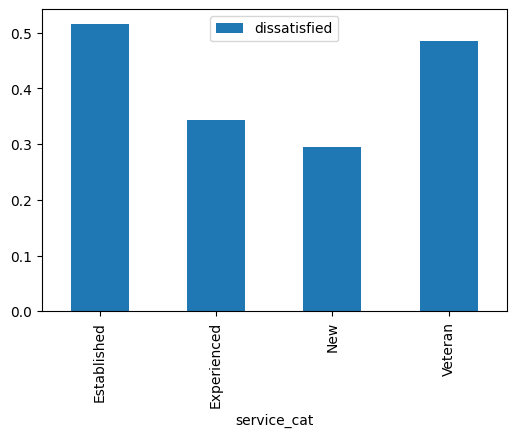

In [98]:
#calculating the percentage of dissatisfied employees
diss_emp = combined_updated.pivot_table(values = 'dissatisfied', index= 'service_cat')

#create chart for dissastified employee
%matplotlib inline
diss_emp.plot(kind = 'bar')

### Result Analysis


**Employee Dissatisfaction Based on Years of Service** : In this section, we have analyze the prevalence of employee dissatisfaction based on different categories of years of service. By examining the dissatisfied column in the combined_updated DataFrame, we aim to gain insights into potential trends and patterns that may exist between an employee's years of service and their level of dissatisfaction.

**Initial Assessment and Data Preparation:**
We initiated the analysis by evaluating the distribution of values within the dissatisfied column using the value_counts() function. This allowed us to understand the proportions of True, False, and missing (NaN) values, which are essential for our analysis.

Handling Missing Data:
Before proceeding, we addressed any missing values in the dissatisfied column to ensure accurate results. Missing values were replaced with False using the .fillna() method, contributing to data consistency and reliability.

Calculating Dissatisfaction Percentage:
To gain a comprehensive perspective on the relationship between years of service and dissatisfaction, we computed the percentage of dissatisfied employees in different categories of service. We created a pivot table named diss_emp that aggregates the data based on the service_cat categories.

Visualizing the Findings:
In order to effectively communicate our findings, we utilized a bar chart to visualize the percentage of dissatisfied employees across the various categories of years of service. The resulting chart provides a clear visual representation of any potential patterns or differences in dissatisfaction levels.

Significance and Insights:
This analysis allows us to uncover insights into the potential correlation between years of service and employee dissatisfaction. By examining the bar chart, we can readily identify whether longer-tenured employees exhibit different levels of dissatisfaction compared to those with shorter tenures. These findings can serve as a basis for deeper investigations and strategic decisions aimed at enhancing employee satisfaction and retention.

In summary, our analysis of employee dissatisfaction based on years of service provides an initial understanding of how this factor may influence workplace contentment. The visual representation of data and insights gained serve as a foundation for further exploration and actions geared towards improving overall employee well-being and organizational success.


